<a href="https://colab.research.google.com/github/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/blob/main/Semana3/Notebooks/Regresi%C3%B3n_usando_m%C3%A1xima_verosimilitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimación de máxima verosimilitud (Maximum Likelihood Estimation - MLE)


In [1]:
import numpy as np
import pandas as pd

from numpy import exp
from scipy.special import factorial

import matplotlib.pyplot as plt

Treisman, Daniel. Replication data for: Russia’s Billionaires: P2016_1068_data: billionaires.xlsx. Nashville, TN: American Economic Association [publisher], 2016. Ann Arbor, MI: Inter-university Consortium for Political and Social Research [distributor], 2019-12-07. https://doi.org/10.3886/E116312V1-91280



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/AnIsAsPe/Estadistica_y_Probabilidad_para-CD-/main/Semana3/Datos/billonaires.csv',
                  dtype={'numbil0': 'int64','gattwto08':'int64'})
df = df[['country', 'lngdppc', 'lnpop', 'gattwto08', 'numbil0']]  #reordenar columnas
df.columns = ['pais', 'PIB_percapita', 'lnpop', 'años_GATT','num_billonarios']  #renombrar columnas

df

,pais,PIB_percapita,lnpop,años_GATT,num_billonarios
0,United States,10.786021,19.532846,60,469
1,Canada,10.743365,17.319439,0,25
2,"Bahamas, The",10.072139,12.760934,0,0
3,Aruba,10.223734,11.526276,0,0
4,Bermuda,11.446847,11.086334,0,0
...,...,...,...,...,...
192,"Micronesia, Fed. Sts.",7.824408,11.556923,0,0
193,Samoa,8.124372,12.119665,15,0
194,"Hong Kong SAR, China",10.356964,15.755374,22,26
195,Puerto Rico,10.122557,15.140160,60,0


**Nuestras X serán las siguientes columnas:**
* PIB_percápita  - Producto Interno Bruto per cápita
* lnpob     - indicador sobre el tamaño de la población
* años_GATT - años de pertenecer al GAT(acceso a mercados internacionales)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pais             197 non-null    object 
 1   PIB_percapita    197 non-null    float64
 2   lnpop            197 non-null    float64
 3   años_GATT        197 non-null    int64  
 4   num_billonarios  197 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 7.8+ KB


In [4]:
y = df['num_billonarios']
X =  df.drop(['num_billonarios', 'pais'], axis=1)

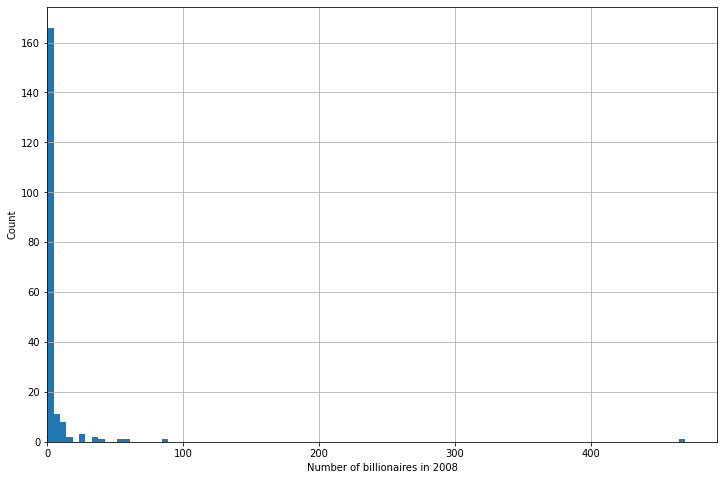

In [5]:
plt.subplots(figsize=(12, 8))
plt.hist(y, bins=100)
plt.xlim(left=0)
plt.grid()
plt.xlabel('Number of billionaires in 2008')
plt.ylabel('Count')
plt.show()

# Distribución Poisson

$f(y;\lambda)= \frac{{\lambda}^{y}}{y!} e^{-\lambda}$

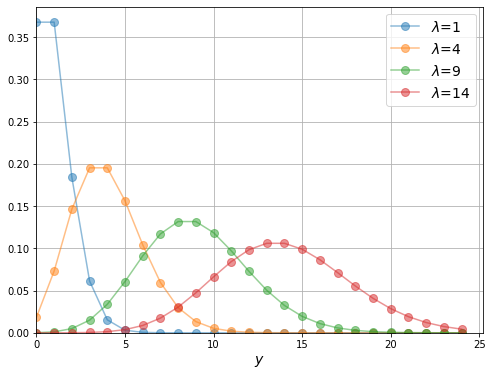

In [6]:
poisson_pmf = lambda y, 𝜆: 𝜆**y / factorial(y) * exp(-𝜆)
ys = range(0, 25)

fig, ax = plt.subplots(figsize=(8, 6))

for 𝜆 in [1, 4, 9, 14]:
    distribution = []
    for y_i in ys:
        distribution.append(poisson_pmf(y_i, 𝜆))
    ax.plot(ys,
            distribution,
            label=f'$\lambda$={𝜆}',
            alpha=0.5,
            marker='o',
            markersize=8)

ax.grid()
ax.set_xlabel('$y$', fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

## Función de probabilidad condicional Poisson

$f(y_i\mid x_i)= \frac{{\lambda_i}^{y_i}}{y_i!} e^{-\lambda_i} ~~~;~~~~ y_i = 0,1,2,...\infty$

donde

$\lambda_i=\exp(\beta_0+\beta_1X_{i1}+...+\beta_dX_{id})$

así $y$ es condicional a los valores de las $x$ y al vector $\beta$

Queremos encontrar $\beta$ que produce la máxima verosimilitud

In [7]:
X['const']=1
X

,PIB_percapita,lnpop,años_GATT,const
0,10.786021,19.532846,60,1
1,10.743365,17.319439,0,1
2,10.072139,12.760934,0,1
3,10.223734,11.526276,0,1
4,11.446847,11.086334,0,1
...,...,...,...,...
192,7.824408,11.556923,0,1
193,8.124372,12.119665,15,1
194,10.356964,15.755374,22,1
195,10.122557,15.140160,60,1


# Regresión Possion utilizando `statsmodels`

In [8]:
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
poisson_reg = sm.Poisson(y, X).fit()
print(poisson_reg.summary())

Optimization terminated successfully.
         Current function value: 2.226090
         Iterations 9
                          Poisson Regression Results                          
Dep. Variable:        num_billonarios   No. Observations:                  197
Model:                        Poisson   Df Residuals:                      193
Method:                           MLE   Df Model:                            3
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.8574
Time:                        14:01:14   Log-Likelihood:                -438.54
converged:                       True   LL-Null:                       -3074.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
PIB_percapita     1.0839      0.035     30.910      0.000       1.015       1.153
lnpop             1.

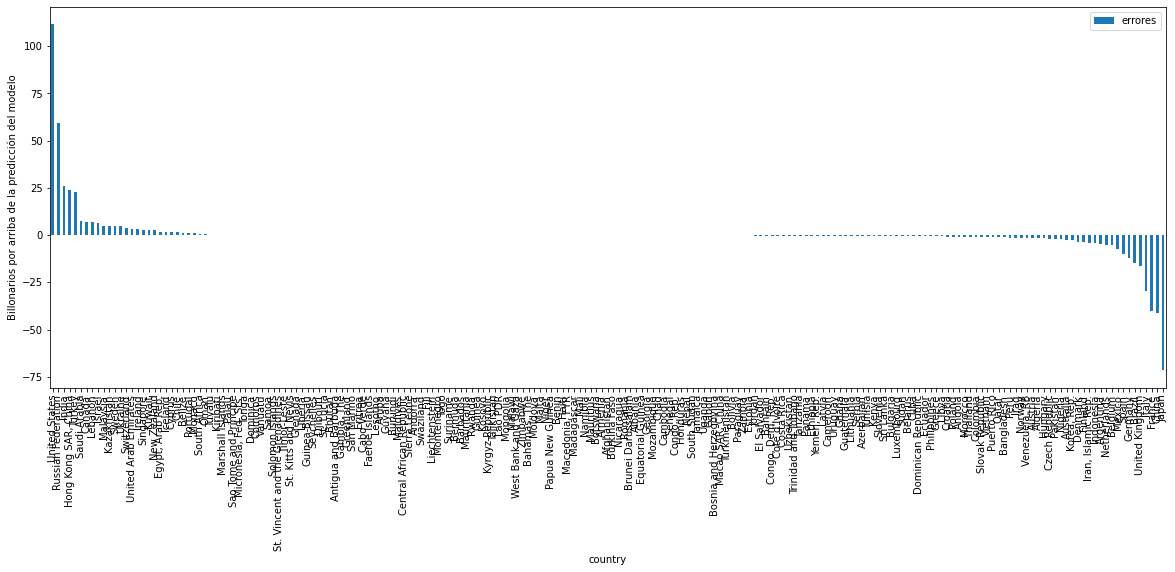

In [10]:
df['y_pred'] = poisson_reg.predict()
df['errores'] = df['num_billonarios']- df['y_pred']
df.sort_values('errores', ascending=False, inplace=True)
df.plot('pais','errores', kind='bar', figsize=(20,7))
plt.ylabel('Billonarios por arriba de la predicción del modelo')
plt.xlabel('country')
plt.show()

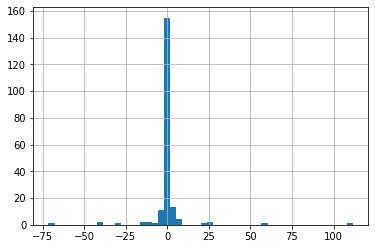

In [14]:
df['errores'].hist(bins=50)

Referencia:

[1] «The Poisson Regression Model», Time Series Analysis, Regression and Forecasting, 7 de junio de 2021. https://timeseriesreasoning.com/contents/poisson-regression-model/ (accedido 4 de agosto de 2022).

